In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Flatten

print(tf.__version__)

1.11.0


In [10]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
train_labels=train_labels.reshape(50000,)
test_labels=test_labels.reshape(10000,)

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train on 33500 samples, validate on 16500 samples
Epoch 1/10
33500/33500 [==============================] - 56s 2ms/step - loss: 1.5249 - acc: 0.4464 - val_loss: 1.3544 - val_acc: 0.5113
Epoch 2/10
33500/33500 [==============================] - 56s 2ms/step - loss: 1.1990 - acc: 0.5767 - val_loss: 1.1989 - val_acc: 0.5750
Epoch 3/10
33500/33500 [==============================] - 58s 2ms/step - loss: 1.0228 - acc: 0.6380 - val_loss: 1.1041 - val_acc: 0.6165
Epoch 4/10
33500/33500 [==============================] - 67s 2ms/step - loss: 0.8709 - acc: 0.6941 - val_loss: 1.0854 - val_acc: 0.6330
Epoch 5/10
33500/33500 [==============================] - 70s 2ms/step - loss: 0.7250 - acc: 0.7455 - val_loss: 1.0953 - val_acc: 0.6430
Epoch 6/10
33500/33500 [==============================] - 69s 2ms/step - loss: 0.5796 - acc: 0.7971 - val_loss: 1.1718 - val_acc: 0.6448
Epoch 7/10
33500/33500 [==============================] - 69s 2ms/step - loss: 0.4300 - acc: 0.8505 - val_loss: 1.2236 - val_acc

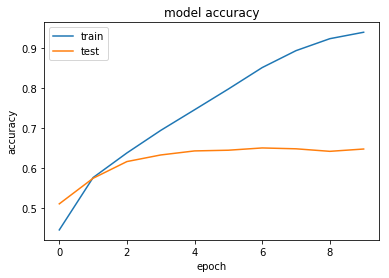

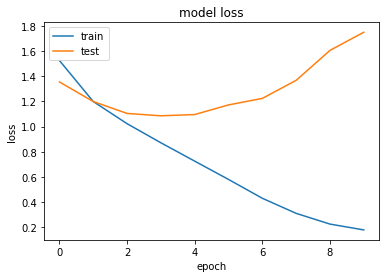

In [16]:
history = model.fit(train_images, train_labels, validation_split=0.33, epochs=10)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1_acc.png', bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1_loss.png', bbox_inches='tight')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 6s 615us/step
Test accuracy: 0.6383


In [18]:
predictions = model.predict(test_images)

In [19]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.2405429e-06 3.4778462e-09 1.3814578e-07 9.9597198e-01 2.8254542e-08
 3.3683528e-03 1.9193375e-04 1.0283632e-09 3.9139905e-04 7.4809359e-05]
3
3


In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

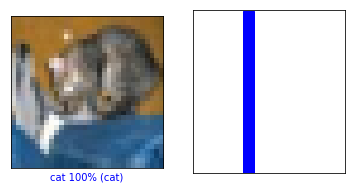

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

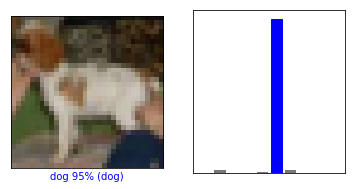

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

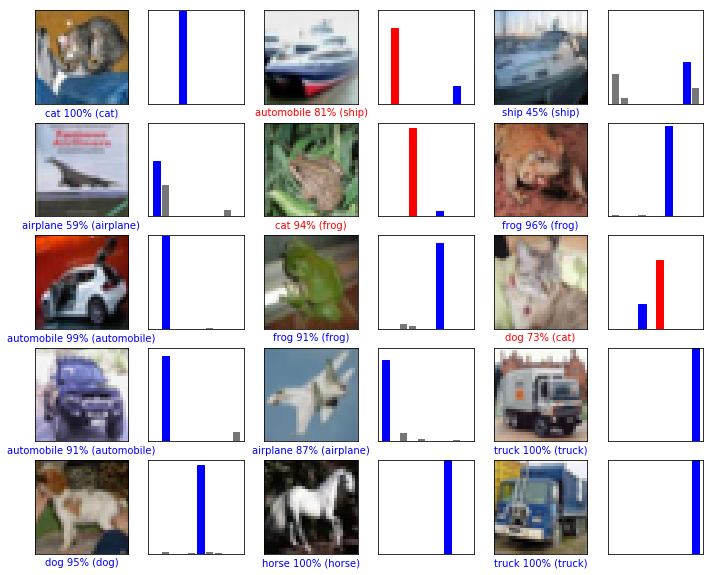

In [29]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.savefig('model_values.png', bbox_inches='tight')

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(32, 32, 3)


In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2405393e-06 3.4778462e-09 1.3814551e-07 9.9597198e-01 2.8254433e-08
  3.3683511e-03 1.9193375e-04 1.0283593e-09 3.9139850e-04 7.4809359e-05]]


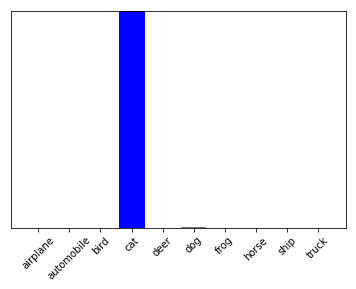

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

3